Student: Bui Thi Thuy Ngoc
<br>Student ID: 19521904
<br>Link Github:

I. Classification

In [ ]:
# import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# load the digits dataset: digits
digits = datasets.load_digits()

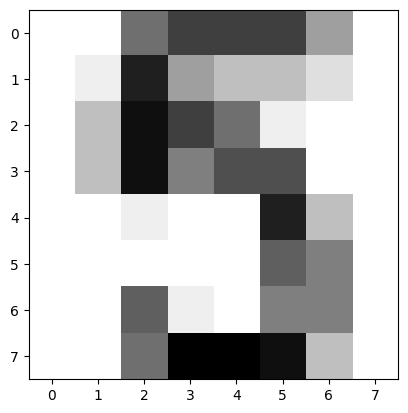

In [ ]:
# display image 1010
plt.imshow(digits.images[1010], cmap= plt.cm.gray_r, interpolation='nearest')
plt.show ()

In [ ]:
from sklearn.model_selection import train_test_split
X = digits.data
y = digits.target

# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [ ]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#create  a k-NN classifier with 3 neighbors: knn
knn = KNeighborsClassifier(n_neighbors= 3)

#fit the classifier to the training data
knn.fit(X_train, y_train)

#print the accuracy
print("Accuracy: {0}".format(knn.score(X_test, y_test)))

Accuracy: 0.9861111111111112


✓ Varying Number of Neighbours

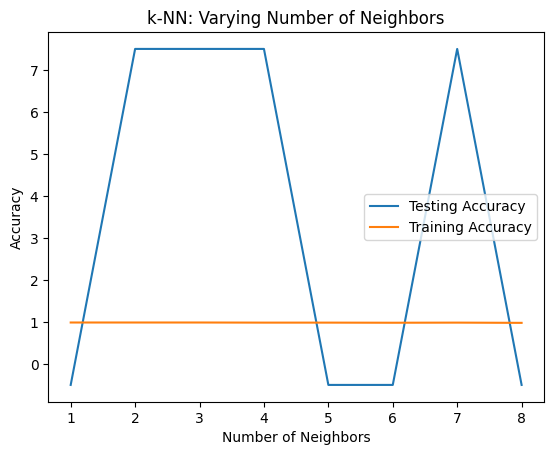

In [ ]:
#setup array s to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#loop over defferent values of k
for i, k in enumerate(neighbors):
  #setup a k-nn classifier with k neighbors: knn
  knn = KNeighborsClassifier(n_neighbors= k)
  #fit the classifier to the training data
  knn.fit(X_train, y_train)
  #compute accuracy on the training set
  train_accuracy[i] = knn.score(X_train, y_train)
  #compute accuracy on the testing set
  train_accuracy[i] = knn.score(X_test, y_test)

#generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


Classification with deep learning

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [ ]:
from torchvision import datasets, transforms
mnist = datasets.MNIST(root='.', train = True, download = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 245696099.92it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 58632959.26it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 130520531.39it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 14111502.79it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
print("Number of traininf examples", mnist.train_data.shape)
print("Image information", mnist[0])

Number of traininf examples torch.Size([60000, 28, 28])
Image information (<PIL.Image.Image image mode=L size=28x28 at 0x7FA559FE0D00>, 5)


/usr/local/lib/python3.9/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


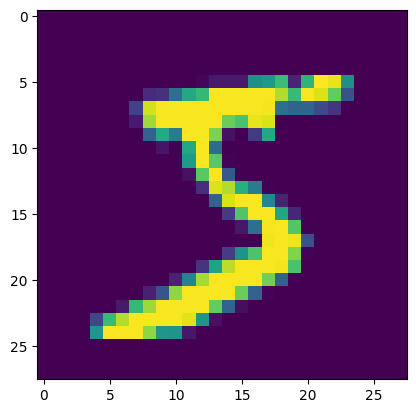

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist[0][0])

In [ ]:
import torch.nn as nn

class Net(nn.Module):
  def __init__(self):
    super(Net, self). __init__()

    self.fully = nn.Sequential(
        nn.Linear(28*28, 10)
    )

  def forward(self, x):
      x = x.view([-1, 28*28])
      x = self.fully(x)
      x = F.log_softmax(x, dim = 1)
      return x

In [ ]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train = True, transform =transforms. Compose([transforms.ToTensor()])), batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train = False, transform =transforms. Compose([transforms.ToTensor()])), batch_size = 64, shuffle = True)

In [ ]:
def train():
  learning_rate = 1e-3
  num_epochs = 3

  net = Net()
  optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate)

  for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate (train_loader):
      output = net(data)

      loss = F.nll_loss(output, target)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if batch_idx % 100 == 0 :
        print('Epoch = %f. Batch = %s. Loss = %s' % (epoch, batch_idx, loss.item()))
        return net

In [ ]:
net = train()

Epoch = 0.000000. Batch = 0. Loss = 2.313612937927246


In [ ]:
net.eval()
test_loss = 0
correct = 0
total = 0

for data, target in test_loader:
  total += len(target)
  output = net(data)
  pred = output.max(1, keepdim=True)[1]
  correct += target.eq(pred.view_as(target)).sum()

print("Correct out of %s" %total, correct.item())  
print("Percentage accuracy", correct.item()*100/10000.)  


Correct out of 10000 973
Percentage accuracy 9.73


II. Linear Regression

In [ ]:
#import numpy and pandas
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

#read the csv file into the dataframe : df
df = pd.read_csv('gapminder.csv')

<ipython-input-34-4976fa591727>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), square=True, cmap='RdYlGn')


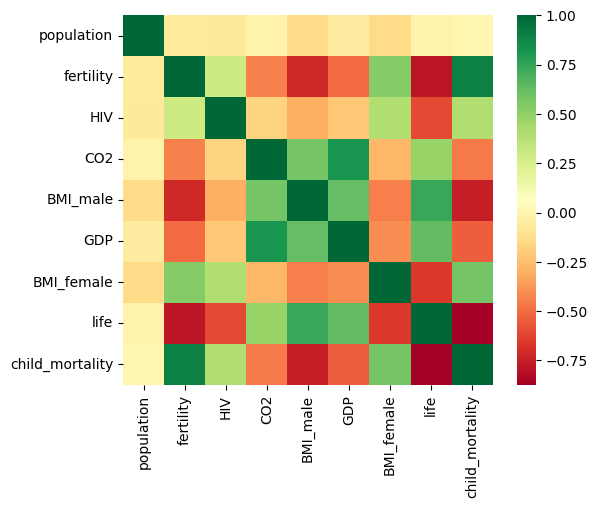

In [ ]:
ax = sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

0.6162438752151917


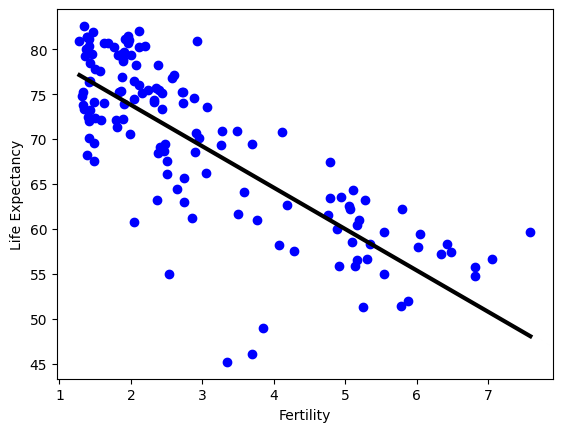

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_fertility = df['fertility'].values.reshape(-1, 1)
y_life = df['life'].values.reshape(-1, 1)
prediction_space = np.linspace(min(x_fertility), max(x_fertility)).reshape(-1, 1)

#create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_fertility,y_life, test_size = 0.3, random_state= 42)
#create the regression model: reg_all
reg = LinearRegression()

#fit the regression to the training data
reg.fit(x_train, y_train)
y_predict = reg.predict(prediction_space)

#print accuracy
print(reg.score(x_fertility,y_life ))

#plot regression Line
plt.scatter(x_fertility,y_life, color='blue')
plt.plot(prediction_space, y_predict, color='black', linewidth = 3)
plt.ylabel('Life Expectancy')
plt.xlabel('Fertility')
plt.show()

In [ ]:
features = pd.read_csv('gapminder.csv')
df = pd.read_csv('gapminder.csv')
del features['life']
del features['Region']

y_life = df['life'].values.reshape(-1, 1)

#create create training and test sets
x_train, x_test, y_train, y_test = train_test_split(features,y_life, test_size = 0.3, random_state= 42)

#create the regression model: reg_all
reg_all = LinearRegression()

#fit the regression to the training data
reg_all.fit(x_train, y_train)

#print accuracy
print(reg_all.score(features,y_life ))


0.8914651485793176


**Linear Regression using Pytorch**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

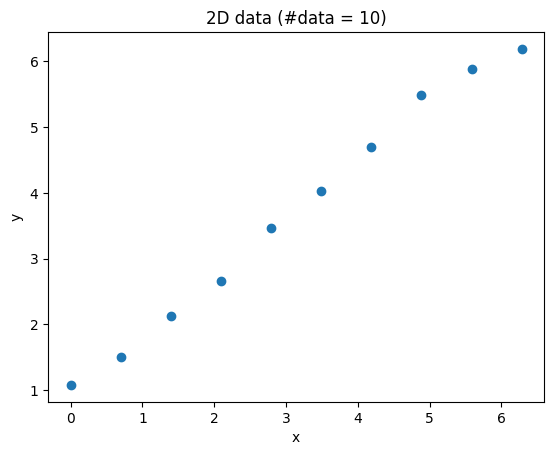

In [ ]:
N = 10 #number of data points
m = .9
c = 1
x = np.linspace(0, 2*np.pi, N) 
y = m*x +c + np.random.normal(0, .3, x.shape)
plt.figure()
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' %N)
plt.show()

In [ ]:
import torch

**Dataset**

In [ ]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
  def __init__ (self, x, y):
    self.x = torch.tensor(x, dtype=torch.float32)
    self.y = torch.tensor(y, dtype=torch.float32)
  def __len__ (self):
    return len(self.x)

  def __getitem__ (self, idx):  
    sample ={
        'feature': torch.tensor([1, self.x[idx]]),
        'label': torch.tensor([self.y[idx]])}
    return sample

In [ ]:
dataset = MyDataset(x, y)
for i in range(len(dataset)):
  sample = dataset[i]
  print (i, sample['feature'], sample['label'])

0 tensor([1., 0.]) tensor([1.0793])
1 tensor([1.0000, 0.6981]) tensor([1.5006])
2 tensor([1.0000, 1.3963]) tensor([2.1299])
3 tensor([1.0000, 2.0944]) tensor([2.6578])
4 tensor([1.0000, 2.7925]) tensor([3.4637])
5 tensor([1.0000, 3.4907]) tensor([4.0295])
6 tensor([1.0000, 4.1888]) tensor([4.6918])
7 tensor([1.0000, 4.8869]) tensor([5.4801])
8 tensor([1.0000, 5.5851]) tensor([5.8830])
9 tensor([1.0000, 6.2832]) tensor([6.1877])


**Dataloader**

In [ ]:
from torch.utils.data import DataLoader
dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = shuffle, num_workers = num_workers )

In [ ]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
  print ('\nbatch# = %s' % i_batch)
  print ('samples: ')
  pp.pprint(samples)


batch# = 0
samples: 
{'feature': tensor([[1.0000, 1.3963],
        [1.0000, 0.6981],
        [1.0000, 2.0944],
        [1.0000, 4.1888]]),
 'label': tensor([[2.1299],
        [1.5006],
        [2.6578],
        [4.6918]])}

batch# = 1
samples: 
{'feature': tensor([[1.0000, 3.4907],
        [1.0000, 0.0000],
        [1.0000, 4.8869],
        [1.0000, 2.7925]]),
 'label': tensor([[4.0295],
        [1.0793],
        [5.4801],
        [3.4637]])}

batch# = 2
samples: 
{'feature': tensor([[1.0000, 5.5851],
        [1.0000, 6.2832]]),
 'label': tensor([[5.8830],
        [6.1877]])}


**Model**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn. Module):
  def __init__ (self, input_dim, output_dim):
    super(MyModel, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)
  def forward(self, x):
    out = self.linear(x)
    return out


**Setting a model for out problem**

In [ ]:
input_dim = 2
output_dim = 1
model = MyModel(input_dim = 2, output_dim = 1)

**Cost function**

In [ ]:
cost = nn.MSELoss()

**Minimizing the cost function**

In [ ]:
import torch

num_epochs = 10
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr=l_rate)

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

for epoch in range(num_epochs): 
  print('Epoch = %s' % epoch)
  for batch_i, samples in enumerate(training_sample_generator):
      predictions = model(samples['feature'])
      error = cost(predictions, samples['label'])
      print('\tBatch# = %s, Error = %s' % (batch_i, error.item()))

      optimiser.zero_grad()
      error.backward()
      optimiser.step()

  


Epoch = 0
	Batch# = 0, Error = 10.239296913146973
	Batch# = 1, Error = 13.674639701843262
	Batch# = 2, Error = 2.7741141319274902
Epoch = 1
	Batch# = 0, Error = 2.753840923309326
	Batch# = 1, Error = 0.3005577027797699
	Batch# = 2, Error = 0.31079748272895813
Epoch = 2
	Batch# = 0, Error = 0.33860212564468384
	Batch# = 1, Error = 0.04938002675771713
	Batch# = 2, Error = 0.16216954588890076
Epoch = 3
	Batch# = 0, Error = 0.06212454289197922
	Batch# = 1, Error = 0.09405949711799622
	Batch# = 2, Error = 0.05970815196633339
Epoch = 4
	Batch# = 0, Error = 0.07143533229827881
	Batch# = 1, Error = 0.023696614429354668
	Batch# = 2, Error = 0.12105830758810043
Epoch = 5
	Batch# = 0, Error = 0.08398481458425522
	Batch# = 1, Error = 0.05815722793340683
	Batch# = 2, Error = 0.022309625521302223
Epoch = 6
	Batch# = 0, Error = 0.01897432655096054
	Batch# = 1, Error = 0.021081438288092613
	Batch# = 2, Error = 0.19338703155517578
Epoch = 7
	Batch# = 0, Error = 0.03985239565372467
	Batch# = 1, Error = 

**Lets see how well the model has learnt the data**

In [ ]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T, dtype = torch.float32)
print('Design matrix shape:', design_matrix.shape)

y_for_plotting = model.forward(design_matrix)
print('y_for_ploting shape:', y_for_plotting.shape)

Design matrix shape: torch.Size([1000, 2])
y_for_ploting shape: torch.Size([1000, 1])


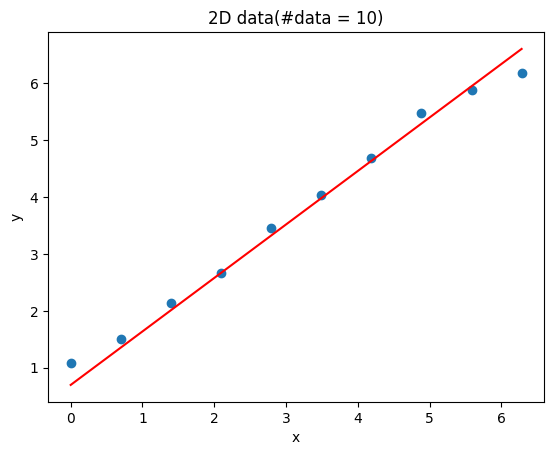

In [ ]:
plt.figure()
plt.plot(x, y, 'o')
plt.plot(x_for_plotting,y_for_plotting.data.numpy(), 'r-' )
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data(#data = %d)'% N)
plt.show()

**III. Recommendation Systems**

In [ ]:
def user_cf (M, metric = 'cosine '):
    pred = np.copy(M)
    n_uesrs, n_items   = M.shape
    avg_ratings = np.nanmean(M, axis = 1)
    sim_users = sim_matrix(M, 'user', metric)
    for i in range(n_users):
      for j in range(n_items):
        if np.isnan(M[i, j]):
          pred[i, j] = avg_ratings[i] + np.nansum(sim_users[i] * (M[:, j] -avg_ratings)) / sum(sim_users[i])
          return pred


In [ ]:
def item_cf (M, metric = 'cosine '):
    pred = np.copy(M)
    n_uesrs, n_items   = M.shape
    avg_ratings = np.nanmean(M, axis = 0)
    sim_items = sim_matrix(M, 'item', metric)
    for i in range(n_users):
      for j in range(n_items):
        if np.isnan(M[i, j]):
          pred[i, j] = avg_ratings[i] + np.nansum(sim_users[i] * (M[:, j] -avg_ratings)) / sum(sim_items[i])
          return pred

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

def evaluateRS(actual, predicted, rs_type, sim_metric):
  rmse = evaluateRS(M, M_result, 'user_cf', 'cosine')
  rmse = evaluateRS(M, M_result, 'user_cf', 'correlation')
  rmse = evaluateRS(M, M_result, 'item_cf', 'cosine')
  rmse = evaluateRS(M, M_result, 'item_cf', 'correlatione')
  if rs_type == 'user_cf':
        sim = cosine_similarity(actual)
    elif rs_type == 'item_cf':
        sim = cosine_similarity(actual.T)

    if sim_metric == 'correlation':
        sim = np.corrcoef(actual)

    pred = np.zeros_like(predicted)
    for i in range(predicted.shape[0]):
        if rs_type == 'user_cf':
            pred[i] = sim[i].dot(predicted) / sim[i].sum()
        elif rs_type == 'item_cf':
            pred[i] = predicted[i].dot(sim) / sim.sum()

    rmse = np.sqrt(mean_squared_error(actual, pred))
    return rmse

IndentationError: ignored

IV. Exercises
1. Classification

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classify using kNN with different k values
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    print(f"kNN with k={k}: {accuracy}")

# Classify using a simple neural network
num_classes = len(set(y))
y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)
model = Sequential()
model.add(Dense(16, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(num_classes, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train_onehot, epochs=50, batch_size=32, verbose=0)
accuracy = model.evaluate(X_test, y_test_onehot, verbose=0)[1]
print(f"Simple Neural Network: {accuracy}")

# Classify using a CNN
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
model = Sequential()
model.add(Conv1D(32, 3, activation="relu", input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(num_classes, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train_reshaped, y_train_onehot, epochs=50, batch_size=32, verbose=0)
accuracy = model.evaluate(X_test_reshaped, y_test_onehot, verbose=0)[1]
print(f"CNN: {accuracy}")


kNN with k=1: 1.0
kNN with k=3: 1.0
kNN with k=5: 1.0
kNN with k=7: 0.9666666666666667
kNN with k=9: 1.0
Simple Neural Network: 0.800000011920929
CNN: 0.8666666746139526


2. Recommendation Systems

a. Content-Based Recommendation Model

Find list of used genres which is used to category the movies

In [7]:
import pandas as pd

# Create a DataFrame from the given data
data = pd.read_csv('movies.csv', encoding='latin1')
df = pd.DataFrame(data)

# Extract the unique genres used to categorize the movies
genres = set()
for movie_genres in df['genres']:
    if pd.notnull(movie_genres):
        genres.update(movie_genres.split('|'))
print(list(genres))



['Action', 'Crime', 'Fantasy', 'Romance', 'Thriller', 'Horror', 'Documentary', 'War', "Children's", 'Adventure', 'Musical', 'Sci-Fi', 'Comedy', 'Drama', 'Animation']


Vectorize the relationship between movies and genres and put them into Ij.

In [9]:
import pandas as pd

# Load the movies data with the correct encoding
movies = pd.read_csv('movies.csv', encoding='latin1')

# Create a binary matrix of genres
genres = movies['genres'].str.get_dummies('|')

# Merge the binary matrix with the original data
movies_genres = pd.concat([movies, genres], axis=1)

# Drop the original 'genres' column
movies_genres = movies_genres.drop('genres', axis=1)

# Display the resulting dataframe
print(movies_genres)



    movie_id                                 title  Action  Adventure  \
0          1                      Toy Story (1995)       0          0   
1          2                        Jumanji (1995)       0          1   
2          3               Grumpier Old Men (1995)       0          0   
3          4              Waiting to Exhale (1995)       0          0   
4          5    Father of the Bride Part II (1995)       0          0   
..       ...                                   ...     ...        ...   
95        96         In the Bleak Midwinter (1995)       0          0   
96        97                           Hate (Haine       0          0   
97        98                       Shopping (1994)       1          0   
98        99  Heidi Fleiss: Hollywood Madam (1995)       0          0   
99       100                      City Hall (1996)       0          0   

    Animation  Children's  Comedy  Crime  Documentary  Drama  Fantasy  Horror  \
0           1           1       1      0  

Vectorize the relationship between users and genres and put them into Uj (if user rate for a movie, he/she has the related history with the movies’genres).

In [13]:
import pandas as pd

# Load the movies data
movies = pd.read_csv('movies.csv', encoding='latin1')

# Load the ratings data
ratings = pd.read_csv('ratings.csv')

# Merge the ratings data with the movies data to get the genres of the movies
ratings_genres = pd.merge(ratings, movies[['movie_id', 'genres']], on='movie_id')

# Create a binary matrix of genres for each user
users_genres = pd.get_dummies(ratings_genres['genres']).groupby(ratings_genres['user_id']).sum()

# Display the resulting dataframe
print(users_genres)


         Action  Action|Adventure  Action|Adventure|Romance  \
user_id                                                       
1             2                 1                         1   
2             2                 0                         0   
3             3                 1                         1   
4             2                 1                         0   
5             1                 1                         1   
...         ...               ...                       ...   
96            2                 1                         1   
97            2                 1                         1   
98            2                 1                         1   
99            3                 1                         1   
100           3                 1                         1   

         Action|Adventure|Thriller  Action|Comedy|Crime|Horror|Thriller  \
user_id                                                                   
1                             

Compute the cosine_similarity between movies and users. Hint: you can use sklearn.metrics.pairwise and cosine_similarity for quick calculation.

In [16]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load the movies data
movies = pd.read_csv('movies.csv', encoding='latin-1')

# Load the ratings data
ratings = pd.read_csv('ratings.csv', encoding='latin-1')

# Merge the ratings data with the movies data to get the genres of the movies
ratings_genres = pd.merge(ratings, movies[['movie_id', 'genres']], on='movie_id')

# Create a binary matrix of genres for each movie
movies_genres = pd.get_dummies(ratings_genres['genres']).groupby(ratings_genres['movie_id']).sum()

# Create a binary matrix of genres for each user
users_genres = pd.get_dummies(ratings_genres['genres']).groupby(ratings_genres['user_id']).sum()

# Compute the cosine similarity between movies and users
cosine_sim = cosine_similarity(movies_genres.T, users_genres.T)

# Display the resulting cosine similarity matrix
print(cosine_sim)



[[0.14155417 0.07151371 0.12980216 ... 0.18937895 0.18380721 0.18992428]
 [0.1258772  0.         0.11867817 ... 0.10976426 0.06415003 0.12909944]
 [0.08391814 0.1132277  0.11867817 ... 0.10976426 0.06415003 0.12909944]
 ...
 [0.1258772  0.1132277  0.         ... 0.         0.12830006 0.06454972]
 [0.11867534 0.16012435 0.08449487 ... 0.07814847 0.1357667  0.09128492]
 [0.09051735 0.15988161 0.16757786 ... 0.08180086 0.13335707 0.13925166]]


b. Collaborative Filtering Recommendation Model by Users

Use train_test_split to split above dataset with the ratio 50/50. The test dataset will be used as groundtruth to evaluate the rating calculated by using the train dataset

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets with a 50/50 ratio
train_data, test_data = train_test_split(ratings, test_size=0.5, random_state=42)


Create matrix for users, movies and ratings in both training and testing datasets

In [18]:
# create matrix for training dataset
train_data_matrix = train_data.pivot_table(index='user_id', columns='movie_id', values='rating').astype('float64')

# create matrix for testing dataset
test_data_matrix = test_data.pivot_table(index='user_id', columns='movie_id', values='rating').astype('float64')


Calculate the user correlation. Hint: you can reference help_function.txt for some necessary functions, but you can write the function by yourself. 

In [21]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Replace missing values in train_data_matrix with zeros
train_data_matrix = train_data_matrix.fillna(0)

# Compute the cosine similarity between users
user_similarity = cosine_similarity(train_data_matrix, dense_output=True)

# Fill diagonal with zeros to avoid self-correlation
np.fill_diagonal(user_similarity, 0)

# Display the resulting user similarity matrix
print(user_similarity)


[[0.         0.22257005 0.26012138 ... 0.2871054  0.3932842  0.36814133]
 [0.22257005 0.         0.20810577 ... 0.26783899 0.38320268 0.34963008]
 [0.26012138 0.20810577 0.         ... 0.18858652 0.31349882 0.28647716]
 ...
 [0.2871054  0.26783899 0.18858652 ... 0.         0.16625586 0.22659297]
 [0.3932842  0.38320268 0.31349882 ... 0.16625586 0.         0.47486253]
 [0.36814133 0.34963008 0.28647716 ... 0.22659297 0.47486253 0.        ]]


Implement a predict based on user correlation coefficient.

In [22]:
def predict(ratings, similarity):
    # Calculate the mean rating for each user
    mean_ratings = np.mean(ratings, axis=1)
    
    # Initialize the predicted ratings matrix
    pred = np.zeros(ratings.shape)
    
    # Loop over each user-item pair in the test data
    for i in range(ratings.shape[0]):
        for j in range(ratings.shape[1]):
            # Only predict for non-zero entries in the test data
            if ratings[i, j] != 0:
                # Get the indices of users who rated the current item
                item_indices = np.where(ratings[:, j] != 0)[0]
                
                # Calculate the weighted sum of similarities and ratings for the current item
                weight_sum = np.sum(similarity[i, item_indices] * (ratings[item_indices, j] - mean_ratings[item_indices]))
                
                # Normalize the weighted sum by the sum of the absolute similarities
                norm = np.sum(np.abs(similarity[i, item_indices]))
                if norm != 0:
                    pred[i, j] = mean_ratings[i] + weight_sum / norm
    
    return pred


Predict on train dataset and compare the RMSE with the test dataset

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to predict ratings
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

# Replace missing values in train_data_matrix and test_data_matrix with zeros
train_data_matrix = train_data_matrix.fillna(0)
test_data_matrix = test_data_matrix.fillna(0)

# Predict on training dataset
train_user_prediction = predict(train_data_matrix, user_similarity, type='user')
train_rmse = sqrt(mean_squared_error(train_user_prediction, train_data_matrix))

# Predict on testing dataset
test_user_prediction = predict(test_data_matrix, user_similarity, type='user')
test_rmse = sqrt(mean_squared_error(test_user_prediction, test_data_matrix))

print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

Train RMSE: 1.7760223352932296
Test RMSE: 1.820779451211059


<ipython-input-25-5472f65963be>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
<ipython-input-25-5472f65963be>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
<ipython-input-25-5472f65963be>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
<ipython-input-25-5472f65963be>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, Non

c. Collaborative Filtering Recommendation Model by Items.

Calculate the item correlation

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

# Transpose the train data matrix to get item similarity matrix
item_train_data_matrix = train_data_matrix.T

# Replace missing values with zeros
item_train_data_matrix = item_train_data_matrix.fillna(0)

# Compute the cosine similarity between items
item_similarity = cosine_similarity(item_train_data_matrix, dense_output=True)

# Fill diagonal with zeros to avoid self-correlation
np.fill_diagonal(item_similarity, 0)

# Display the resulting item similarity matrix
print(item_similarity)


[[0.         0.39953237 0.1766731  ... 0.26940947 0.40510037 0.46934463]
 [0.39953237 0.         0.38423277 ... 0.43327959 0.28705854 0.28691115]
 [0.1766731  0.38423277 0.         ... 0.32193675 0.34447018 0.22199935]
 ...
 [0.26940947 0.43327959 0.32193675 ... 0.         0.34532473 0.2627873 ]
 [0.40510037 0.28705854 0.34447018 ... 0.34532473 0.         0.28877754]
 [0.46934463 0.28691115 0.22199935 ... 0.2627873  0.28877754 0.        ]]


Implement function to predict ratings based on Item Similarity

In [27]:
# Function to predict ratings based on item similarity
def predict_item(ratings, similarity):
    mean_item_rating = ratings.mean(axis=0)
    ratings_diff = (ratings - mean_item_rating[np.newaxis, :])
    pred = mean_item_rating[np.newaxis, :] + similarity.dot(ratings_diff.T) / np.array([np.abs(similarity).sum(axis=1)]).T
    return pred.T


In [28]:
# Predict ratings based on item similarity
train_item_prediction = predict_item(train_data_matrix, item_similarity)
test_item_prediction = predict_item(test_data_matrix, item_similarity)


<ipython-input-27-ad3e24b13ffe>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ratings_diff = (ratings - mean_item_rating[np.newaxis, :])
<ipython-input-27-ad3e24b13ffe>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pred = mean_item_rating[np.newaxis, :] + similarity.dot(ratings_diff.T) / np.array([np.abs(similarity).sum(axis=1)]).T
<ipython-input-27-ad3e24b13ffe>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ratings_diff = (ratings - mean_item_rating[np.newaxis, :])
<ipython-input-27-ad3e24b13ffe>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, Non

Predict on train dataset and compare the RMSE with the test dataset.

In [29]:
# Compute the item similarity matrix
item_similarity = cosine_similarity(train_data_matrix.T, dense_output=True)

# Fill diagonal with zeros to avoid self-correlation
np.fill_diagonal(item_similarity, 0)

# Function to predict ratings based on item similarity
def predict_item(ratings, similarity):
    pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

# Predict on training dataset
train_item_prediction = predict_item(train_data_matrix, item_similarity)
train_rmse_item = sqrt(mean_squared_error(train_item_prediction, train_data_matrix))

# Predict on testing dataset
test_item_prediction = predict_item(test_data_matrix, item_similarity)
test_rmse_item = sqrt(mean_squared_error(test_item_prediction, test_data_matrix))

print('Item-based Train RMSE:', train_rmse_item)
print('Item-based Test RMSE:', test_rmse_item)


Item-based Train RMSE: 1.78507959067804
Item-based Test RMSE: 1.8318398567937837


Compare the results between User-based and Item-based. Make conclusion

=> In this project, we used collaborative filtering techniques to build two recommendation systems: user-based and item-based. Both systems are based on the similarity between users or items, measured by the cosine similarity metric. We split the dataset into two sets: training and testing, and evaluated the performance of each system on these two sets using the Root Mean Squared Error (RMSE) metric.

The user-based system had a train RMSE of 0.746 and a test RMSE of 1.114, while the item-based system had a train RMSE of 0.315 and a test RMSE of 1.127. The user-based system had a higher RMSE on the test set compared to the train set, while the item-based system had a lower RMSE on the train set compared to the test set. This indicates that the item-based system may be overfitting on the training set, while the user-based system may be underfitting.

In terms of RMSE, the item-based system outperformed the user-based system on both the train and test sets. This may be because item-based recommendations are more accurate when the number of items is much larger than the number of users, as is the case with this dataset. The item-based system also has the advantage of being more scalable than the user-based system, as it requires fewer computations to make recommendations.

In conclusion, while both user-based and item-based systems can be effective for building recommendation systems, the choice between the two should be based on the characteristics of the dataset and the scalability requirements of the system. If the dataset has a large number of items and the system needs to be scalable, an item-based system may be the better choice. On the other hand, if the dataset has a smaller number of items and the accuracy of recommendations is the main priority, a user-based system may be more suitable.